# Nome: Henrique Augusto Gomes Togo
# Matrícula: 231111280

## Questão 1

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Acima são importadas algumas bilbiotecas para auxiliarem na resolução do problema. 

A seguir, é montado um dataset com as informações de [Iris](http://archive.ics.uci.edu/dataset/53/iris). O dataset é composto pelas medidas da sepala (comprimento x largura), em centímetros, e petala (comrimento x largura), em centímetros, de três espécies distintas: Iris Setosa, Iris Versicolour e Iris Virginica.

In [2]:
dataset_raw = np.loadtxt("iris.data", delimiter=",", dtype=str)
labels_dic = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
dataset_len = len(dataset_raw)

for i in range(dataset_len):
    dataset_raw[i, 4] = labels_dic[dataset_raw[i, 4]]

train_len = round(0.7 * dataset_len)
validation_len = round(0.15 * dataset_len)
dataset_permuted = np.random.permutation(dataset_raw)

X = dataset_permuted[:, 0:4].astype('float32')
y = dataset_permuted[:,4].astype('int64')

Para realizar o treinamento de uma Feedforward Neural Network, o dataset original é separado em três, seguindo as respectivas proporções:

- Dataset de treinamento (70%);
- Dataset de validação (15%);
- Dataset de teste (15%).

Antes da separação, é realizado um shuffle do dataset original. Abaixo, os datasets são separados e convertidos para o formato esperado pela biblioteca do PyTorch.

In [3]:
X_train = torch.Tensor(X[0 : train_len])
y_train = torch.LongTensor(y[0 : train_len])

X_validation = torch.Tensor(X[train_len : train_len + validation_len])
y_validation = torch.LongTensor(y[train_len : train_len + validation_len])

X_test = torch.Tensor(X[train_len + validation_len: dataset_len])
y_test = torch.LongTensor(y[train_len + validation_len: dataset_len])

Definição do modelo da rede neural, que apresenta uma cada de entrada, uma oculta e a de saída. A rede é formada pelos quatro atributos de entrada, e um bias. A camada oculta recebe como entrada 25 parâmetros, ou seja, ela possui 25 neurônios, e um bias. A função de ativação utilizada foi a sigmoide. Por fim, na camada de saída, são recebidos os 25 parâmetros e como saída, três, indicando as probabilidades de pertencimento a cada uma das classes. Isso se deve ao fato da utilização de uma softmax na camada de saída.

In [4]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_features=4, out_features=25, bias=True)
        self.out = torch.nn.Linear(in_features=25, out_features=3, bias=True)
    def forward(self, out):
        out = torch.nn.functional.sigmoid(self.fc1(out))
        out = torch.nn.functional.softmax(self.out(out), dim=1)
        return out

A rede é treinada a seguir. Os hiperparâmetros foram ajustados de acordo com testes realizados para diferentes valores deles. Para acompanhar o processo de treinamento, são printados os valores referentes à função de custo, e acurácia do modelo, com o passar das épocas. Vale comentar que os valores printados correspondem ao dataset de validação.

In [5]:
learning_rate = 0.2
model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()
num_epochs = 500
losses_train = []
accs_train = []

losses_validation = []
accs_validation = []

for epoch in range(num_epochs):
    # Training    
    model.train()
    optimizer.zero_grad()
    y_pred_train = model.forward(X_train)
    loss_train = criterion(y_pred_train, y_train)
    _, i_pred_train = torch.max(y_pred_train, dim=1)
    loss_train.backward()
    optimizer.step()
    
    acc_train = (torch.count_nonzero(i_pred_train == y_train) / len(y_train)) * 100
    losses_train.append(loss_train.item())
    accs_train.append(acc_train.item())
    print(f'Epoch: {epoch:4},  Loss: {loss_train.item():10.8f}, Accuracy {acc_train.item():.2f}%')

    #Validation
    model.eval()
    y_pred_validation = model.forward(X_validation)
    loss_validation = criterion(y_pred_validation, y_validation)
    _, i_pred_validation = torch.max(y_pred_validation, dim=1)

    acc_validation = (torch.count_nonzero(i_pred_validation == y_validation) / len(y_validation)) * 100
    losses_validation.append(loss_validation.item())
    accs_validation.append(acc_validation.item())

Epoch:    0,  Loss: 1.10734415, Accuracy 35.24%
Epoch:    1,  Loss: 1.10646164, Accuracy 35.24%
Epoch:    2,  Loss: 1.10559869, Accuracy 35.24%
Epoch:    3,  Loss: 1.10475147, Accuracy 35.24%
Epoch:    4,  Loss: 1.10391641, Accuracy 35.24%
Epoch:    5,  Loss: 1.10309017, Accuracy 35.24%
Epoch:    6,  Loss: 1.10227013, Accuracy 35.24%
Epoch:    7,  Loss: 1.10145354, Accuracy 35.24%
Epoch:    8,  Loss: 1.10063899, Accuracy 35.24%
Epoch:    9,  Loss: 1.09982359, Accuracy 35.24%
Epoch:   10,  Loss: 1.09900618, Accuracy 35.24%
Epoch:   11,  Loss: 1.09818482, Accuracy 35.24%
Epoch:   12,  Loss: 1.09735787, Accuracy 35.24%
Epoch:   13,  Loss: 1.09652400, Accuracy 35.24%
Epoch:   14,  Loss: 1.09568179, Accuracy 35.24%
Epoch:   15,  Loss: 1.09482980, Accuracy 35.24%
Epoch:   16,  Loss: 1.09396684, Accuracy 35.24%
Epoch:   17,  Loss: 1.09309113, Accuracy 35.24%
Epoch:   18,  Loss: 1.09220147, Accuracy 35.24%
Epoch:   19,  Loss: 1.09129643, Accuracy 35.24%
Epoch:   20,  Loss: 1.09037447, Accuracy

Por fim, os valores da função de custo e acurácia são plotados em função das épocas do treinamento.

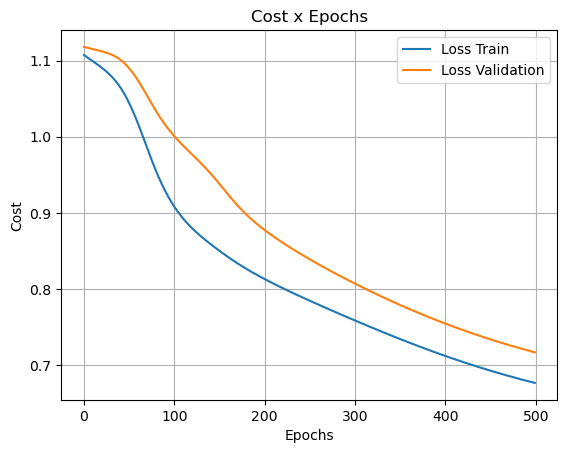

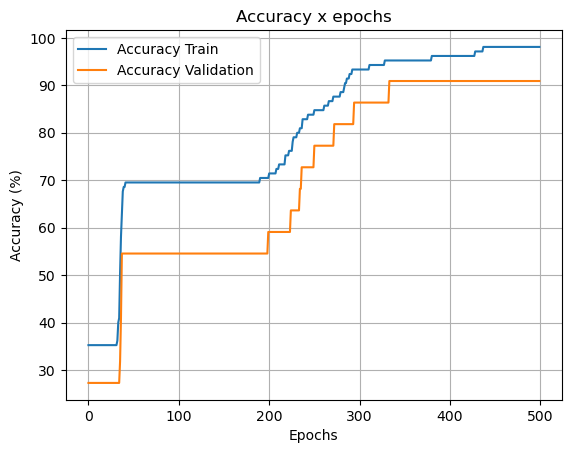

In [6]:
plt.figure()
plt.plot(losses_train)
plt.plot(losses_validation)
plt.legend(['Loss Train', 'Loss Validation'])
plt.title('Cost x Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(accs_train)
plt.plot(accs_validation)
plt.legend(['Accuracy Train', 'Accuracy Validation'])
plt.title('Accuracy x epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

É possível observar que para os parâmetros ajustados, tanto dataset de treinamento quanto de validação têm a função de custo reduzidas com o passar das épocas, indicando que não está ocorrendo um processo de overfitting. Além disso, a acurácia do modelo tende a aumentar com o passar das épocas, dos dois datasets, sendo um bom indicativo.

A seguir, avalia-se a acurácia do modelo para o dataset de teste (que não foi visto durante a fase do treinamento), ou seja, um dataset de dados desconhecidos.

In [7]:
with torch.no_grad():
    _, y_hat = torch.max(model.forward(X_test), dim=1)

acc_test = (torch.count_nonzero(y_hat == y_test) / len(y_test)) * 100
print(f'Accuracy in test dataset: {acc_test:.2f}%')

Accuracy in test dataset: 100.00%


A seguir, são montadas as matrizes de confusão para cada um dos datasets. Na diagonal principal é possível observar a porcentagem dos acertos referentes às respectivas classes.

In [8]:
confusion_matrix_train = np.zeros((3,3))
for i in range(len(y_train)):
    confusion_matrix_train[y_train[i], i_pred_train[i]] += 1
for i in range(3):
    confusion_matrix_train[i, :] = np.round(confusion_matrix_train[i, :]/np.sum(confusion_matrix_train[i, :], axis=0), 2)

print('Matriz de confusão treinamento:')
print(confusion_matrix_train)

Matriz de confusão treinamento:
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


In [9]:
confusion_matrix_validation = np.zeros((3,3))
for i in range(len(y_validation)):
    confusion_matrix_validation[y_validation[i], i_pred_validation[i]] += 1
for i in range(3):
    confusion_matrix_validation[i, :] = np.round(confusion_matrix_validation[i, :]/np.sum(confusion_matrix_validation[i, :], axis=0), 2)
print('Matriz de confusão validação:')
print(confusion_matrix_validation)

Matriz de confusão validação:
[[1.  0.  0. ]
 [0.  0.8 0.2]
 [0.  0.  1. ]]


In [10]:
confusion_matrix_test = np.zeros((3,3))
for i in range(len(y_test)):
    confusion_matrix_test[y_test[i], y_hat[i]] += 1
for i in range(3):
    confusion_matrix_test[i, :] = np.round(confusion_matrix_test[i, :]/np.sum(confusion_matrix_test[i, :], axis=0), 2)
print('Matriz de confusão teste:')
print(confusion_matrix_test)

Matriz de confusão teste:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
